<a href="https://colab.research.google.com/github/alanexplorer/Robotic-Algorithm-Tutorial/blob/master/kalmanFIlter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kalman Filter

## Introduction

Kalman filtering is an algorithm that provides estimates of some unknown variables given the measurements observed over time. Kalman filters have been demonstrating its usefulness in various applications. Kalman filters have relatively simple form and require small computational power

## Problem definition

Kalman filters are used to estimate states based on linear dynamical systems in
state space format. The Kalman filter represents beliefs by the moments parameterization: At time $t$, the belief is represented by the the mean $\mu_t$ and the covariance $\Sigma_t$. The process model defines the evolution of the state from time $t - 1$ to time $t$. The state transition probability $p(x_t | u_t, x_{t−1})$ must be a linear function in its arguments with added Gaussian noise. This is expressed by the following equation:

$x_t = A_tx_{t−1} + B_tu_t + \varepsilon_t$

Here $x_t$ and $x_{t−1}$ are state vectors, and ut is the control vector at time t.
In our notation, both of these vectors are vertical vectors. They are of the
form

$x_{t}^{n} = \begin{pmatrix} \\ x_{t}^{1}\\ x_{t}^{2}\\ \vdots \\ x_{t}^{n}\\ \end{pmatrix}$ and $u_{t}^{m} = \begin{pmatrix} \\ u_{t}^{1}\\ u_{t}^{2}\\ \vdots \\ u_{t}^{m}\\ \end{pmatrix}$

where $A_t$ is the state transition matrix applied to the previous state vector $x_{t−1}$, $A_t$ is a square matrix of size $n \times n$, where $n$ is
the dimension of the state vector $x_t$. $B_t$ is the control-input matrix applied to the control vector $u_{k}$, $B_t$ have a size $n \times m$, with $m$ being the dimension of the control vector $u_t$.  and $\varepsilon_t$ is the process noise vector that is assumed to be zero-mean Gaussian with the covariance $R_t$, $\varepsilon_t \sim 𝒩(0,R)$.

The measurement probability $p(z_t | x_t)$ must also be linear in its arguments, with added Gaussian noise. The process model is paired with the measurement model that describes the relationship between the state and the measurement at the current time step t as:

$z_t = C_tx_t + \delta_t$

where $z_t$ is the measurement vector, $C_t$ is the measurement matrix, $C_t$ is a matrix of size $k \times n$, where $k$ is the dimension of the measurement vector $z_t$. The $\delta_t$ is the measurement noise vector that is assumed to be zero-mean Gaussian with the covariance $Q_t$ , $\delta_t \sim 𝒩(0,Q)$.

The role of the Kalman filter is to provide estimate of $x_t$ at time $t$, given the initial estimate of $x_0$ , the series of measurement, $z_1,z_2,…,z_t$ , and the information of the system described by $A_t$ , $B_t$ , $C_t$ , $Q$, and $R$. Note that subscripts to these matrices are omitted here by assuming that they are invariant over time as in most applications. Although the covariance matrices are supposed to reflect the statistics of the noises, the true statistics of the noises is not known or not Gaussian in many practical applications. Therefore, Q and R are usually used as tuning parameters that the user can adjust to get desired performance.

## Pseudocode


$1: Algorithm Kalmanfilter(μt−1, Σt−1, ut, zt):$

$2:    \bar{\mu}_t = A_t \mu_{t−1} + B_t u_t$

$3:    \bar{\Sigma}_t = A_t \Sigma_{t−1} A^T_t + R_t$

$4:    K_t = \bar{\Sigma}_t C^T_t (C_t \Sigma_t C^T_t + Q_t)^{−1}$

$5:    \mu_t = \bar{\mu}_t + K_t(z_t − C_t \bar{\mu}_t)$

$6:    \Sigma_t = (I − K_t C_t)\bar{\Sigma}_t$

$7:    return (\mu_t, \Sigma_t)$


## Summary

### Prediction:

| Description                | Representation in the pseudocodigo|
|----------------------------|-------------------------------------------------------|
| Predicted state estimate   | $\bar{\mu} _t = A_t \mu_ {t−1}  + B_t u_t$            |
| Predicted error covariance | $\bar{\Sigma}  _t = A_t \Sigma_  {t−1}   A^T_t + R_t$ |

### Update:

| Description              | Representation in the pseudocodigo |
|--------------------------|----------------------------------------------------------------|
| Measurement residual     | $(z_t − C_t \bar{\mu} _t)$                                     |
| Kalman gain              | $K_t = \bar{\Sigma} _t C^T_t (C_t \Sigma_t C^T_t + Q_t)^{−1} $ |
| Updated state estimate   | $\mu_t = \bar{\mu} _t + K_t(z_t − C_t \bar{\mu} _t)$           |
| Updated error covariance | $\Sigma_t = (I − K_t C_t)\bar{\Sigma} _t$                      |

## Kalman Filter for Sensor Fusion

## The Kalman Filter 1-D

Kalman filters are discrete systems that allows us to define a dependent variable by an independent variable, where by we will solve for the independent variable so that when we are given measurements (the dependent variable),we can infer an estimate     of the independent variable assuming that noise exists from our input measurement and noise also exists in how we’ve modeled the world with our math equations because of inevitably unaccounted for factors in the non-sterile world.Input variables become more valuable when modeled as a system of equations,ora  matrix, in order to make it possible to determine the relationships between those values. Every variables in every dimension will contain noise, and therefore the introduction of related inputs will allow weighted averaging to take place based on the predicted differential at the next step, the noise unaccounted for in the system,and the noise introduced by the sensor inputs.

In [244]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb
from scipy import stats
import time
from numpy.linalg import inv
import scipy.stats as scs

In [245]:
%matplotlib inline
fw = 10 # figure width

#### Plot the Distributions in this range:

In [246]:
x = np.linspace(-100,100,1000)

In [247]:
mean0 = 0.0   # e.g. meters or miles
var0  = 20.0

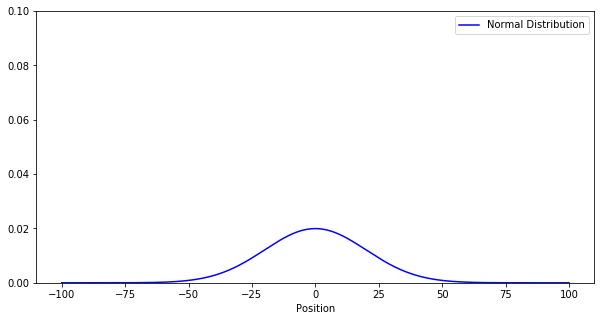

In [248]:
plt.figure(figsize=(fw,5))
plt.plot(x, scs.norm.pdf(x, mean0, var0), 'b', label='Normal Distribution')
plt.ylim(0, 0.1);
plt.legend(loc='best');
plt.xlabel('Position');

## Now we have something, which estimates the moved distance

#### The Mean is  meters, calculated from velocity*dt or step counter or wheel encoder ...

#### VarMove is the Estimated or determined with static measurements

In [249]:
meanMove = 25.0
varMove  = 10.0 

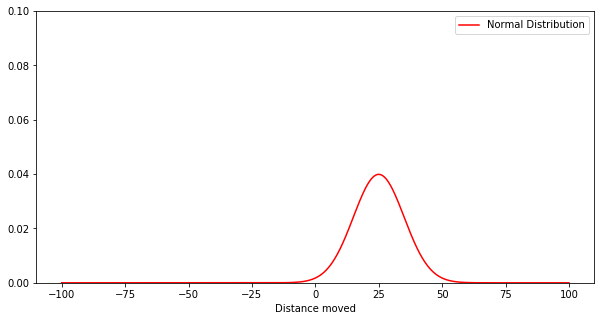

In [250]:
plt.figure(figsize=(fw,5))
plt.plot(x,scs.norm.pdf(x, meanMove, varMove), 'r', label='Normal Distribution')
plt.ylim(0, 0.1);
plt.legend(loc='best');
plt.xlabel('Distance moved');

Both Distributions have to be merged together
$\mu_\text{new}=\mu_\text{0}+\mu_\text{move}$ is the new mean and $\sigma^2_\text{new}=\sigma^2_\text{0}+\sigma^2_\text{move}$ is the new variance.



In [251]:
def predict(var, mean, varMove, meanMove):
    new_var = var + varMove
    new_mean= mean+ meanMove
    return new_var, new_mean

In [252]:
new_var, new_mean = predict(var0, mean0, varMove, meanMove)

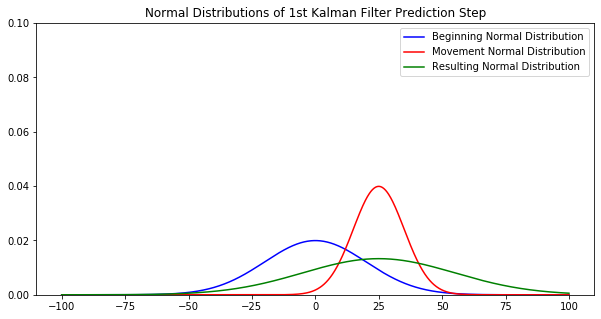

In [253]:
plt.figure(figsize=(fw,5))
plt.plot(x,scs.norm.pdf(x, mean0, var0), 'b', label='Beginning Normal Distribution')
plt.plot(x,scs.norm.pdf(x, meanMove, varMove), 'r', label='Movement Normal Distribution')
plt.plot(x,scs.norm.pdf(x, new_mean, new_var), 'g', label='Resulting Normal Distribution')
plt.ylim(0, 0.1);
plt.legend(loc='best');
plt.title('Normal Distributions of 1st Kalman Filter Prediction Step');
plt.savefig('Kalman-Filter-1D-Step.png', dpi=150)

### What you see: The resulting distribution is flat > uncertain.

The more often you run the predict step, the flatter the distribution get

First Sensor Measurement (Position) is coming in...
#### Sensor Defaults for Position Measurements
(Estimated or determined with static measurements)

In [254]:
meanSensor = 25.0
varSensor  = 12.0

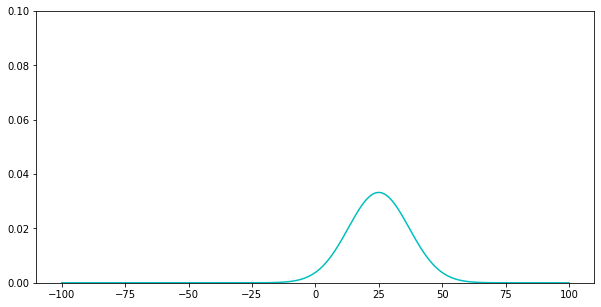

In [255]:
plt.figure(figsize=(fw,5))
plt.plot(x,scs.norm.pdf(x, meanSensor, varSensor), 'c')
plt.ylim(0, 0.1);

Now both Distributions have to be merged together
$\sigma^2_\text{new}=\cfrac{1}{\cfrac{1}{\sigma^2_\text{old}}+\cfrac{1}{\sigma^2_\text{Sensor}}}$ is the new variance and the new mean value is $\mu_\text{new}=\cfrac{\sigma^2_\text{Sensor} \cdot \mu_\text{old} + \sigma^2_\text{old} \cdot \mu_\text{Sensor}}{\sigma^2_\text{old}+\sigma^2_\text{Sensor}}$

In [256]:
def correct(var, mean, varSensor, meanSensor):
    new_mean=(varSensor*mean + var*meanSensor) / (var+varSensor)
    new_var = 1/(1/var +1/varSensor)
    return new_var, new_mean

In [257]:
var, mean = correct(new_var, new_mean, varSensor, meanSensor)

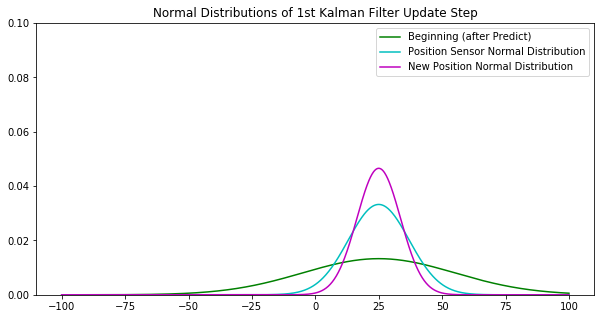

In [258]:
plt.figure(figsize=(fw,5))
plt.plot(x,scs.norm.pdf(x, new_mean, new_var), 'g', label='Beginning (after Predict)')
plt.plot(x,scs.norm.pdf(x, meanSensor, varSensor), 'c', label='Position Sensor Normal Distribution')
plt.plot(x,scs.norm.pdf(x, mean, var), 'm', label='New Position Normal Distribution')
plt.ylim(0, 0.1);
plt.legend(loc='best');
plt.title('Normal Distributions of 1st Kalman Filter Update Step');

###### This is called the Measurement or Correction step! The Filter get's more serious about the actual state.

#### Let's put everything together: The 1D Kalman Filter
"Kalman-Filter: Predicting the Future since 1960"

Let's say, we have some measurements for position and for distance traveled. Both have to be fused with the 1D-Kalman Filter.

In [259]:
positions = (10, 20, 30, 40, 50)+np.random.randn(5)
distances = (10, 10, 10, 10, 10)+np.random.randn(5)

In [260]:
positions

array([10.3266042 , 20.89387408, 29.3947916 , 39.875685  , 48.93473369])

In [261]:
distances

array([ 9.07429798, 10.3234591 , 11.58789189,  9.57728332, 11.52106393])

After correction:  mean= 19.65	var= 7.29
After correction:  mean= 24.61	var= 7.08
After correction:  mean= 32.20	var= 7.05
After correction:  mean= 40.66	var= 7.04
After correction:  mean= 50.28	var= 7.04


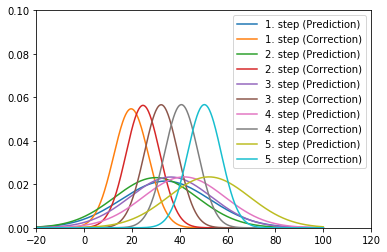

In [262]:
for m in range(len(positions)):
    
    # Predict
    var, mean = predict(var, mean, varMove, distances[m])
    #print('mean: %.2f\tvar:%.2f' % (mean, var))
    plt.plot(x,scs.norm.pdf(x, mean, var), label='%i. step (Prediction)' % (m+1))
    
    # Correct
    var, mean = correct(var, mean, varSensor, positions[m])
    print('After correction:  mean= %.2f\tvar= %.2f' % (mean, var))
    plt.plot(x,scs.norm.pdf(x, mean, var), label='%i. step (Correction)' % (m+1))
    
plt.ylim(0, 0.1);
plt.xlim(-20, 120)
plt.legend();


The sensors are represented as normal distributions with their parameters ($\mu$ and $\sigma^2$) and are calculated together with addition or convolution. The prediction decreases the certainty about the state, the correction increases the certainty.

Prediction: Certainty $\downarrow$
Correction: Certainty $\uparrow$

## Kalman Filter - Multi-Dimensional Measurement

### Kalman Filter Implementation for Constant Velocity Model (CV) in Python

![Image](http://www.cbcity.de/wp-content/uploads/2013/06/Fahrzeug_GPS_Tunnel-520x181.jpg)

Situation covered: You drive with your car in a tunnel and the GPS signal is lost. Now the car has to determine, where it is in the tunnel. The only information it has, is the velocity in driving direction. The x and y component of the velocity ($\dot x$ and $\dot y$) can be calculated from the absolute velocity (revolutions of the wheels) and the heading of the vehicle (yaw rate sensor).

![Kalman Filter](Kalman-Filter-Step.png)

First, we have to initialize the matrices and vectors. Setting up the math.

## State Vector

Constant Velocity Model for Ego Motion

$$x_t= \left[ \matrix{ x \\ y \\ \dot x \\ \dot y} \right] = \matrix{ \text{Position x} \\ \text{Position y} \\ \text{Velocity in x} \\ \text{Velocity in y}}$$

Formal Definition (Motion of Law):

$$x_{t} = \textbf{$A_t$} \cdot x_{t-1}$$

which is

$$x_{t} = \begin{bmatrix}1 & 0 & \Delta t & 0 \\ 0 & 1 & 0 & \Delta t \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 \end{bmatrix} \cdot \begin{bmatrix} x \\ y \\ \dot x \\ \dot y \end{bmatrix}_{t-1}$$

Observation Model:

$$z_t = \textbf{$C_t$}\cdot x_t$$

which is

$$z_t = \begin{bmatrix}0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1\end{bmatrix} \cdot x_t$$ means: You observe the velocity directly in the correct unit

### Initial State $x_0$

$$x_{0} = \begin{bmatrix}0 \\ 0 \\ 0 \\ 0\end{bmatrix}$$

[[0.]
 [0.]
 [0.]
 [0.]] (4, 1)


Text(0.5, 1.0, 'Initial Location')

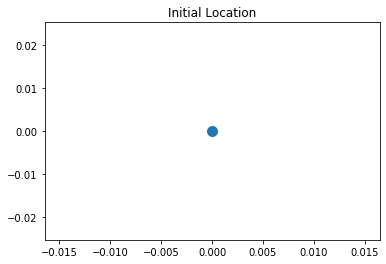

In [263]:
x = np.matrix([[0.0, 0.0, 0.0, 0.0]]).T
print(x, x.shape)
plt.scatter(float(x[0]),float(x[1]), s=100)
plt.title('Initial Location')

### Covariance Matrix $P_0$ ($\Sigma_0$)

An uncertainty must be given for the initial state $x_0$ . In the 1D case, the $\mu_0$ , now a matrix, defines an initial uncertainty for all states.

This matrix is most likely to be changed during the filter passes. It is changed in both the Predict and Correct steps. If one is quite sure about the states at the beginning, one can use low values here, if one does not know exactly how the values of the state vector are, the covariance matrix should be initialized with very large values (1 million or so) to allow the filter to converge relatively quickly (find the right values based on the measurements).


$$P_{0} = \begin{bmatrix}\sigma^2_x & 0 & 0 & 0 \\ 0 & \sigma^2_y & 0 & 0 \\ 0 & 0 & \sigma^2_{\dot x} & 0 \\ 0 & 0 & 0 & \sigma^2_{\dot y} \end{bmatrix}$$

with $\sigma$ as the standard deviation

In [264]:
P = np.diag([1000.0, 1000.0, 1000.0, 1000.0])
print(P, P.shape)

[[1000.    0.    0.    0.]
 [   0. 1000.    0.    0.]
 [   0.    0. 1000.    0.]
 [   0.    0.    0. 1000.]] (4, 4)


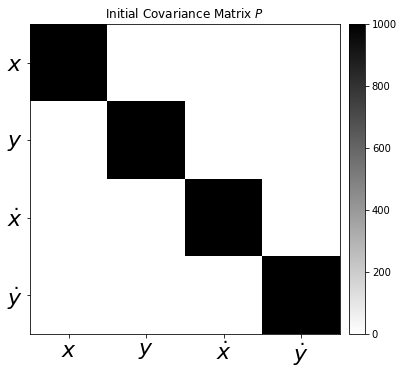

In [265]:
fig = plt.figure(figsize=(6, 6))
im = plt.imshow(P, interpolation="none", cmap=plt.get_cmap('binary'))
plt.title('Initial Covariance Matrix $P$')
ylocs, ylabels = plt.yticks()
# set the locations of the yticks
plt.yticks(np.arange(7))
# set the locations and labels of the yticks
plt.yticks(np.arange(6),('$x$', '$y$', '$\dot x$', '$\dot y$'), fontsize=22)

xlocs, xlabels = plt.xticks()
# set the locations of the yticks
plt.xticks(np.arange(7))
# set the locations and labels of the yticks
plt.xticks(np.arange(6),('$x$', '$y$', '$\dot x$', '$\dot y$'), fontsize=22)

plt.xlim([-0.5,3.5])
plt.ylim([3.5, -0.5])

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
plt.colorbar(im, cax=cax);

### Dynamic Matrix $A$

It is calculated from the dynamics of the Egomotion.

$$x_{t} = x_{t-1} + \dot x_{t-1} \cdot \Delta t$$
$$y_{t} = y_{t} + \dot y_{t-1} \cdot \Delta t$$
$$\dot x_{t} = \dot x_{t-1}$$
$$\dot y_{t} = \dot y_{t-1}$$

In [266]:
dt = 0.1 # Time Step between Filter Steps

A = np.matrix([[1.0, 0.0, dt, 0.0],
              [0.0, 1.0, 0.0, dt],
              [0.0, 0.0, 1.0, 0.0],
              [0.0, 0.0, 0.0, 1.0]])
print(A, A.shape)

[[1.  0.  0.1 0. ]
 [0.  1.  0.  0.1]
 [0.  0.  1.  0. ]
 [0.  0.  0.  1. ]] (4, 4)


### Measurement Matrix $C_t$

We directly measure the Velocity $\dot x$ and $\dot y$

$$H = \begin{bmatrix}0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1\end{bmatrix}$$

In [267]:
C = np.matrix([[0.0, 0.0, 1.0, 0.0],
              [0.0, 0.0, 0.0, 1.0]])
print(C, C.shape)

[[0. 0. 1. 0.]
 [0. 0. 0. 1.]] (2, 4)


### Measurement Noise Covariance $Q_t$

Tells the Kalman Filter how 'bad' the sensor readings are.

$$Q_t = \begin{bmatrix}\sigma^2_{\dot x} & 0 \\ 0 & \sigma^2_{\dot y} \end{bmatrix}$$

In [268]:
ra = 10.0**2

Q = np.matrix([[ra, 0.0],
              [0.0, ra]])
print(Q, Q.shape)

[[100.   0.]
 [  0. 100.]] (2, 2)


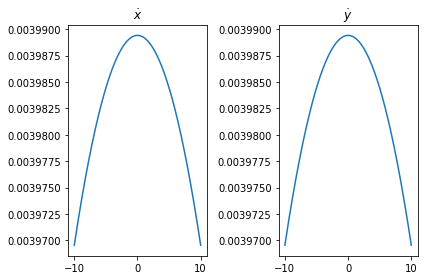

In [269]:
# Plot between -10 and 10 with .001 steps.
xpdf = np.arange(-10, 10, 0.001)
plt.subplot(121)
plt.plot(xpdf, norm.pdf(xpdf,0,Q[0,0]))
plt.title('$\dot x$')

plt.subplot(122)
plt.plot(xpdf, norm.pdf(xpdf,0,Q[1,1]))
plt.title('$\dot y$')
plt.tight_layout()

### Process Noise Covariance $R$

The Position of the car can be influenced by a force (e.g. wind), which leads to an acceleration disturbance (noise). This process noise has to be modeled with the process noise covariance matrix R.

$$R = \begin{bmatrix}\sigma_{x}^2 & \sigma_{xy} & \sigma_{x \dot x} & \sigma_{x \dot y} \\ \sigma_{yx} & \sigma_{y}^2 & \sigma_{y \dot x} & \sigma_{y \dot y} \\ \sigma_{\dot x x} & \sigma_{\dot x y} & \sigma_{\dot x}^2 & \sigma_{\dot x \dot y} \\ \sigma_{\dot y x} & \sigma_{\dot y y} & \sigma_{\dot y \dot x} & \sigma_{\dot y}^2 \end{bmatrix}$$

One can calculate R as

$$R = G\cdot G^T \cdot \sigma_v^2$$

with $G = \begin{bmatrix}0.5dt^2 & 0.5dt^2 & dt & dt\end{bmatrix}^T$ and $\sigma_v$ as the acceleration process noise, which can be assumed for a vehicle to be $8.8m/s^2$, according to: Schubert, R., Adam, C., Obst, M., Mattern, N., Leonhardt, V., & Wanielik, G. (2011). [Empirical evaluation of vehicular models for ego motion estimation](http://ieeexplore.ieee.org/xpl/articleDetails.jsp?arnumber=5940526). 2011 IEEE Intelligent Vehicles Symposium (IV), 534–539. doi:10.1109/IVS.2011.5940526

In [270]:
sv = 8.8

G = np.matrix([[0.5*dt**2],
               [0.5*dt**2],
               [dt],
               [dt]])

R = G*G.T*sv**2

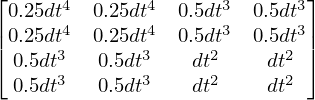

In [271]:
from sympy import Symbol, Matrix
from sympy.interactive import printing
printing.init_printing()
dts = Symbol('dt')
Rs = Matrix([[0.5*dts**2],[0.5*dts**2],[dts],[dts]])
Rs*Rs.T

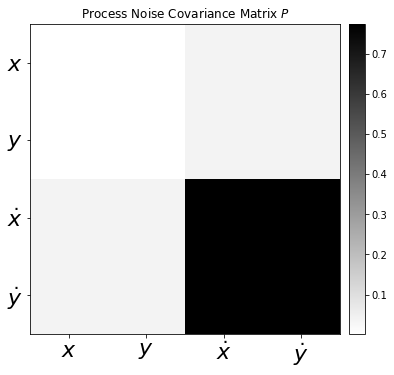

In [272]:
fig = plt.figure(figsize=(6, 6))
im = plt.imshow(R, interpolation="none", cmap=plt.get_cmap('binary'))
plt.title('Process Noise Covariance Matrix $P$')
ylocs, ylabels = plt.yticks()
# set the locations of the yticks
plt.yticks(np.arange(7))
# set the locations and labels of the yticks
plt.yticks(np.arange(6),('$x$', '$y$', '$\dot x$', '$\dot y$'), fontsize=22)

xlocs, xlabels = plt.xticks()
# set the locations of the yticks
plt.xticks(np.arange(7))
# set the locations and labels of the yticks
plt.xticks(np.arange(6),('$x$', '$y$', '$\dot x$', '$\dot y$'), fontsize=22)

plt.xlim([-0.5,3.5])
plt.ylim([3.5, -0.5])

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
plt.colorbar(im, cax=cax);

### Identity Matrix $I$

In [273]:
I = np.eye(4)
print(I, I.shape)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]] (4, 4)


## Measurements

For example, we are using some random generated measurement values

In [274]:
m = 200 # Measurements
vx= 20 # in X
vy= 10 # in Y

mx = np.array(vx+np.random.randn(m))
my = np.array(vy+np.random.randn(m))

measurements = np.vstack((mx,my))

print(measurements.shape)

print('Standard Deviation of Acceleration Measurements=%.2f' % np.std(mx))
print('You assumed %.2f in Q.' % Q[0,0])

(2, 200)
Standard Deviation of Acceleration Measurements=0.96
You assumed 100.00 in Q.


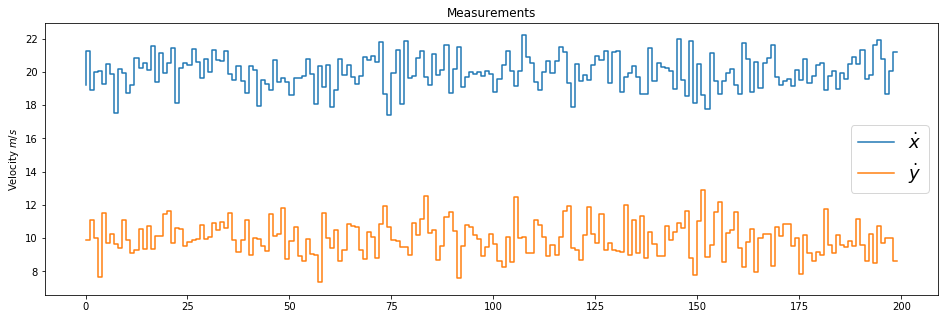

In [275]:
fig = plt.figure(figsize=(16,5))

plt.step(range(m),mx, label='$\dot x$')
plt.step(range(m),my, label='$\dot y$')
plt.ylabel(r'Velocity $m/s$')
plt.title('Measurements')
plt.legend(loc='best',prop={'size':18})

In [276]:
# Preallocation for Plotting
xt = []
yt = []
dxt= []
dyt= []
Zx = []
Zy = []
Px = []
Py = []
Pdx= []
Pdy= []
Rdx= []
Rdy= []
Kx = []
Ky = []
Kdx= []
Kdy= []

def savestates(x, Z, P, Q, K):
    xt.append(float(x[0]))
    yt.append(float(x[1]))
    dxt.append(float(x[2]))
    dyt.append(float(x[3]))
    Zx.append(float(Z[0]))
    Zy.append(float(Z[1]))
    Px.append(float(P[0,0]))
    Py.append(float(P[1,1]))
    Pdx.append(float(P[2,2]))
    Pdy.append(float(P[3,3]))
    Rdx.append(float(Q[0,0]))
    Rdy.append(float(Q[1,1]))
    Kx.append(float(K[0,0]))
    Ky.append(float(K[1,0]))
    Kdx.append(float(K[2,0]))
    Kdy.append(float(K[3,0]))    

# Kalman Filter

![Kalman Filter](Kalman-Filter-Step.png)

In [277]:
for n in range(len(measurements[0])):
 
    # Time Update (Prediction)
    # ========================
    # Project the state ahead
    x = A*x
    
    # Project the error covariance ahead
    P = A*P*A.T + R
    
    
    # Measurement Update (Correction)
    # ===============================
    # Compute the Kalman Gain
    S = C*P*C.T + Q
    K = (P*C.T) * np.linalg.pinv(S)

    
    # Update the estimate via z
    Z = measurements[:,n].reshape(2,1)
    y = Z - (C*x)                            # Innovation or Residual
    x = x + (K*y)
    
    # Update the error covariance
    P = (I - (K*C))*P
    
    
    
    # Save states (for Plotting)
    savestates(x, Z, P, Q, K)

# Let's take a look at the filter performance

### Kalman Gains $K$

In [278]:
def plot_K():
    fig = plt.figure(figsize=(16,9))
    plt.plot(range(len(measurements[0])),Kx, label='Kalman Gain for $x$')
    plt.plot(range(len(measurements[0])),Ky, label='Kalman Gain for $y$')
    plt.plot(range(len(measurements[0])),Kdx, label='Kalman Gain for $\dot x$')
    plt.plot(range(len(measurements[0])),Kdy, label='Kalman Gain for $\dot y$')

    plt.xlabel('Filter Step')
    plt.ylabel('')
    plt.title('Kalman Gain (the lower, the more the measurement fullfill the prediction)')
    plt.legend(loc='best',prop={'size':22})

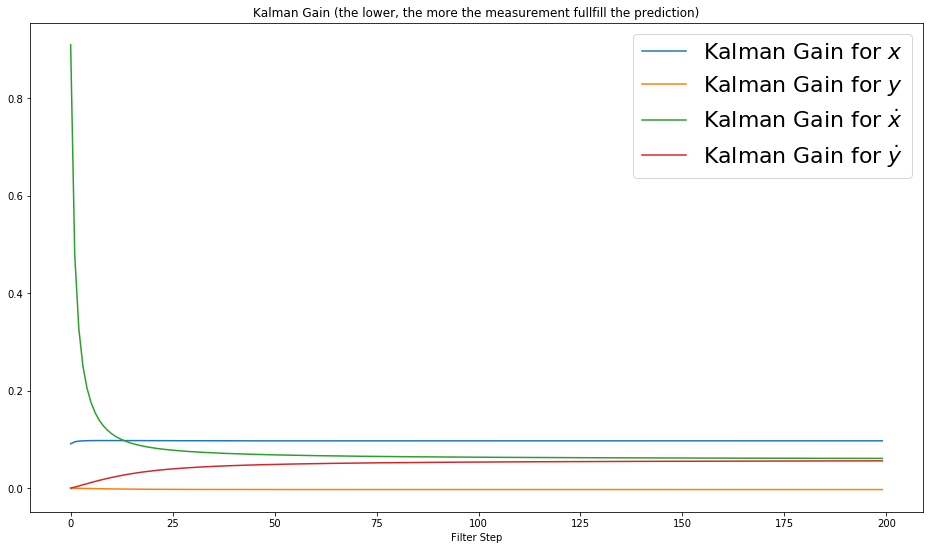

In [279]:
plot_K()

### Uncertainty Matrix $P$

In [280]:
def plot_P():
    fig = plt.figure(figsize=(16,9))
    plt.plot(range(len(measurements[0])),Px, label='$x$')
    plt.plot(range(len(measurements[0])),Py, label='$y$')
    plt.plot(range(len(measurements[0])),Pdx, label='$\dot x$')
    plt.plot(range(len(measurements[0])),Pdy, label='$\dot y$')

    plt.xlabel('Filter Step')
    plt.ylabel('')
    plt.title('Uncertainty (Elements from Matrix $P$)')
    plt.legend(loc='best',prop={'size':22})

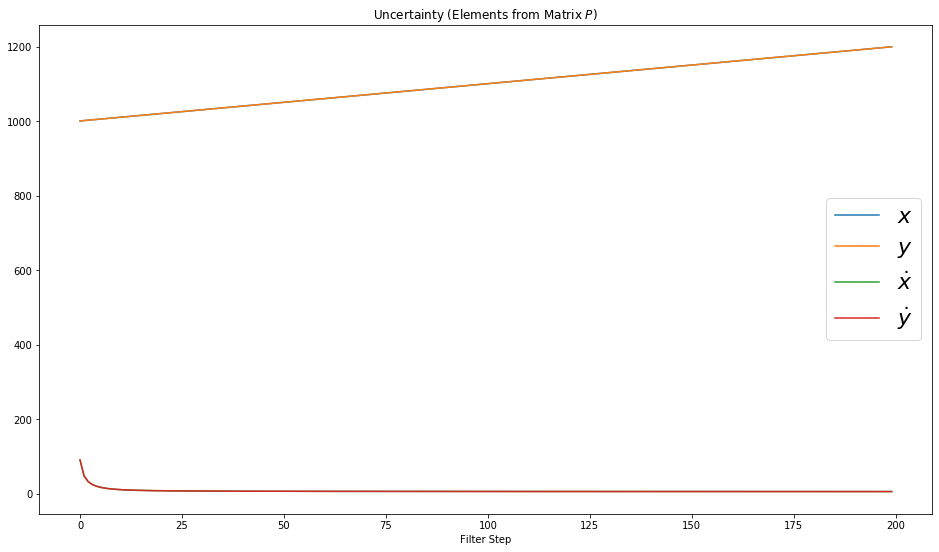

In [281]:
plot_P()

### State Estimate $x$

In [282]:
def plot_x():
    fig = plt.figure(figsize=(16,9))
    plt.step(range(len(measurements[0])),dxt, label='$\dot x$')
    plt.step(range(len(measurements[0])),dyt, label='$\dot y$')

    plt.axhline(vx, color='#999999', label='$\dot x_{real}$')
    plt.axhline(vy, color='#999999', label='$\dot y_{real}$')

    plt.xlabel('Filter Step')
    plt.title('Estimate (Elements from State Vector $x$)')
    plt.legend(loc='best',prop={'size':22})
    plt.ylim([0, 30])
    plt.ylabel('Velocity')

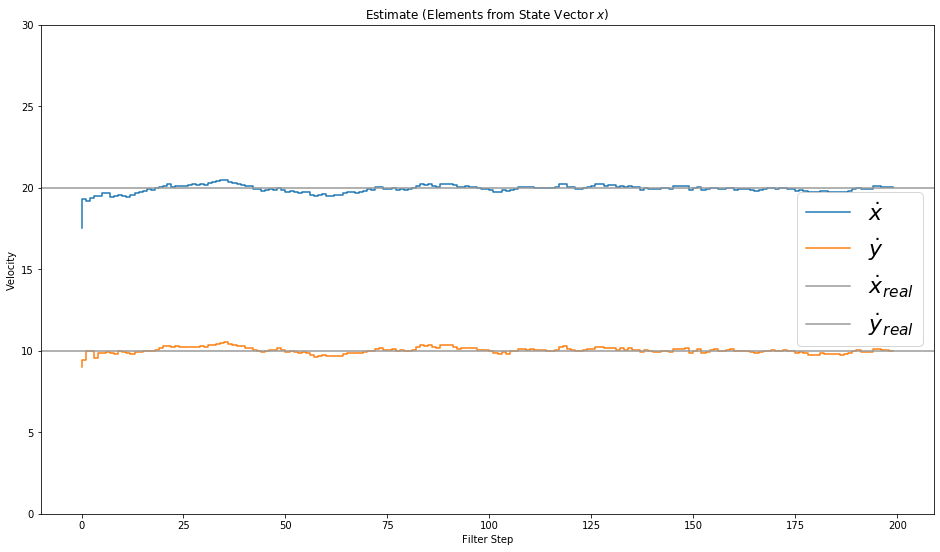

In [283]:
plot_x()

## Position x/y

In [284]:
def plot_xy():
    fig = plt.figure(figsize=(16,16))
    plt.scatter(xt,yt, s=20, label='State', c='k')
    plt.scatter(xt[0],yt[0], s=100, label='Start', c='g')
    plt.scatter(xt[-1],yt[-1], s=100, label='Goal', c='r')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Position')
    plt.legend(loc='best')
    plt.axis('equal')

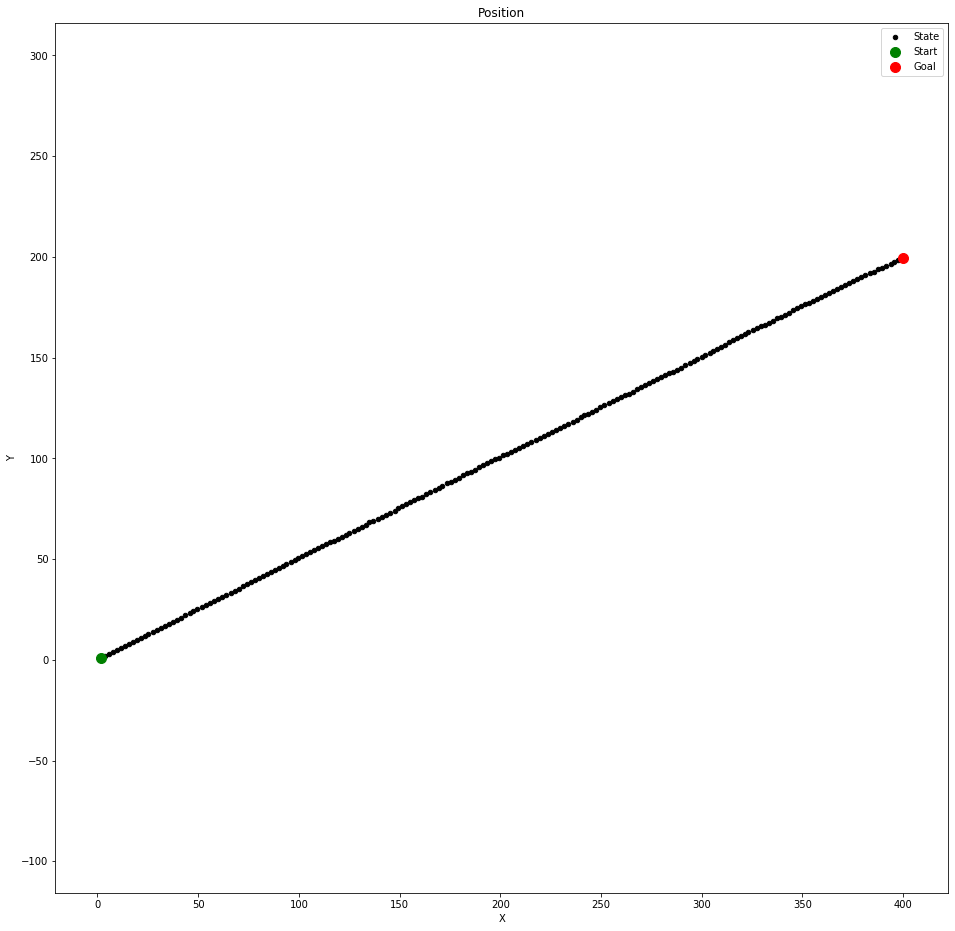

In [285]:
plot_xy()